# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Wed Nov 15 07:19:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P8    13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.1.0+cu118


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

1. **Healthcare**  --> x-ray, cancer detection, ct scan and MRI

2. **Transportation** --> self-driving cars, pedestrain detecion

3. **Manufacturing** --> defect detection, anaylsis tehxt and barcodes, finerprint recognition, 3d model building

4. **Agriculture** --> crop monitoring, automatic weeding, plant disease detection

5. **Retail** --> self checkout, automatic replenishment, people counting

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Model fits too closely to the trainig dataset instead of generalizing.


## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

Ways to prevent overfitting in machine learning:

1. Train with more data
2. Data augmentation
3. Addition of noise to the input data
4. Feature selection
5. Cross-validation
6. Simplify data
7. Regularization(L1 and L2)
8. Ensembling
9. Ensembling
10. Early stopping


## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [3]:
!pip install torchmetrics

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform = torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [5]:
len(train_data), len(test_data)

(60000, 10000)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [6]:
image, label = train_data[0]
image.shape, image, label # shape of the input tenosr, and example of its insides and a label

(torch.Size([1, 28, 28]),
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000

In [7]:
class_names = train_data.classes
class_names # the names of the classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [8]:
class_to_idx = train_data.class_to_idx
class_to_idx # the name of the clasees plus their indexes

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [9]:
 train_data.targets # show the data set targets(the number responds to the number in the cell above)

tensor([5, 0, 4,  ..., 5, 6, 8])

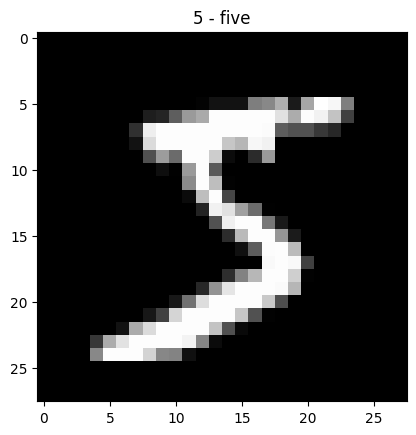

In [10]:
import matplotlib.pyplot as plt

image, label = train_data[0] # image and a label of the first image in the data, above u can see that it is indeed 5
plt.title(class_names[label]) # the label of the image as the time
plt.imshow(image.squeeze(),cmap="gray") # if u do not squeeze you are going to get (1, 28, 28) and u can not plot that on a 2D plot

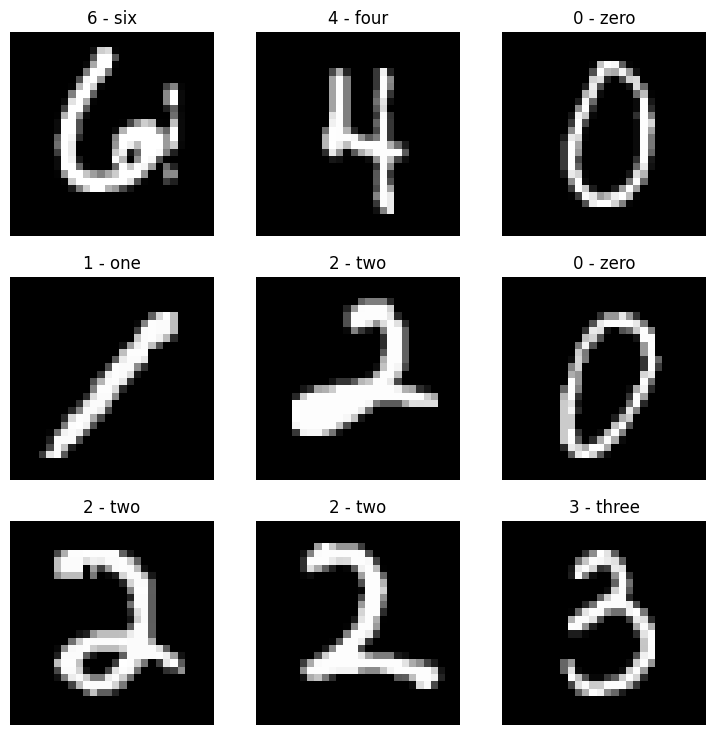

In [11]:
fig = plt.figure(figsize=(9,9)) # size of the picture, bigger values = bigger pictures
rows, cols = 3,3 # how many pictures in each column and row
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data),size=[]).item() # .itme() is used to return a scalar(int) since torch.randint give a tensor
  image,label = train_data[random_idx] # get a random image and a label for it
  fig.add_subplot(rows, cols, i) # add sub plots which are equal the amount of rows and cols
  plt.imshow(image.squeeze(), cmap="gray") # shows image in grey
  plt.title(class_names[label]) # lable of the as the title
  plt.axis(False) # turn of axis

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [12]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = 32,
    shuffle = True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=32,
    shuffle=False
)

len(train_dataloader), len(test_dataloader)

(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [13]:
class CNN(nn.Module):
  def __init__(self, input: int, hidden: int, output: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input, out_channels = hidden, kernel_size = (3,3), stride = 1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden, out_channels = hidden, kernel_size = (3,3), stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden, out_channels = hidden, kernel_size = (3,3), stride = 1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden, out_channels = hidden, kernel_size = (3,3), stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )

    self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features = hidden*7*7,
                    out_features = output)
      )

  def forward(self, x):
    x=self.conv_block_1(x)
    x=self.conv_block_2(x)
    x=self.classifier(x)
    return x

model0 = CNN(1,10,10).to(device)
model0

CNN(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8.


In [14]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [15]:
def train_mode(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, optimizer, device = device):
  train_loss, train_acc = 0, 0
  model.train()

  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    # 1. Forward
    y_pred = model(X)
    # 2. Loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    # 2.1 Acc
    train_acc += accuracy_fn(y, y_pred.argmax(dim=1))

    # 3. zero step
    optimizer.zero_grad()
    # 4. loss backwards
    loss.backward()
    # 5. optimizer step
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.2f}%")

In [16]:
def test_mode(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, device = device):
  test_loss, test_acc = 0, 0
  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:
      X, y = X.to(device), y.to(device)

      y_pred = model(X)

      test_loss += loss_fn(y_pred, y)

      test_acc += accuracy_fn(y, y_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%")

In [17]:
from timeit import default_timer as timer
from tqdm.auto import tqdm

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr=0.1)

EPOCHS = 3

for epoch in tqdm(range(EPOCHS)):
  print(f"\nEpoch: {epoch}\n----------")
  train_mode(model=model0,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer=optimizer,
             device=device)

  test_mode(model=model0,
            data_loader = test_dataloader,
            loss_fn=loss_fn,
            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0
----------
Train loss: 0.3225 | Train acc: 89.06%
Test loss: 0.0710 | Test acc: 97.74%

Epoch: 1
----------
Train loss: 0.0755 | Train acc: 97.72%
Test loss: 0.0523 | Test acc: 98.44%

Epoch: 2
----------
Train loss: 0.0595 | Train acc: 98.12%
Test loss: 0.0577 | Test acc: 98.12%


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [18]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device = device):

  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader): # go thorugh all of the batches
      X, y = X.to(device), y.to(device)

      y_pred = model(X)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim=1))


      loss /= len(data_loader)
      acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc
            }

model0_eval = eval_model(model=model0,
                         data_loader = train_dataloader,
                         loss_fn = loss_fn,
                         accuracy_fn = accuracy_fn,
                         device = device)

model0_eval

  0%|          | 0/1875 [00:00<?, ?it/s]

{'model_name': 'CNN',
 'model_loss': 3.2553068649576744e-06,
 'model_acc': 0.053361792956243326}

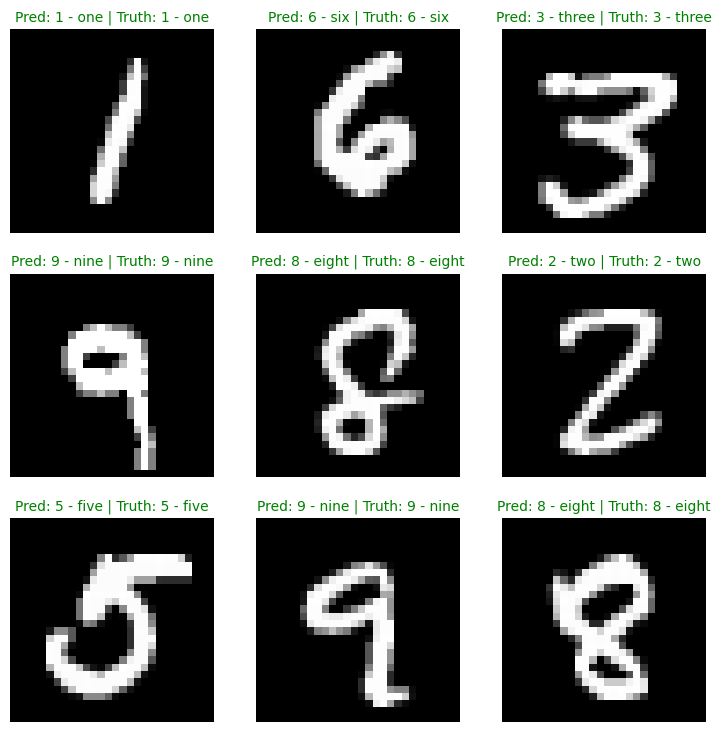

In [19]:
import random
def make_prediction(model: torch.nn.Module,
                    data: list,
                    device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass
      pred_logit = model(sample)

      # Get prediction prob
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_porb off the GPU for the calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

test_samples = []
test_labels = []

# random values from the data set
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# predictions
pred_probs = make_prediction(model=model0,
                             data=test_samples)

pred_classes = pred_probs.argmax(dim=1)


plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)

  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction(in text form)
  pred_label = class_names[pred_classes[i]]

  # Get the truth label(in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality betwwen pred and truth
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

  0%|          | 0/313 [00:00<?, ?it/s]

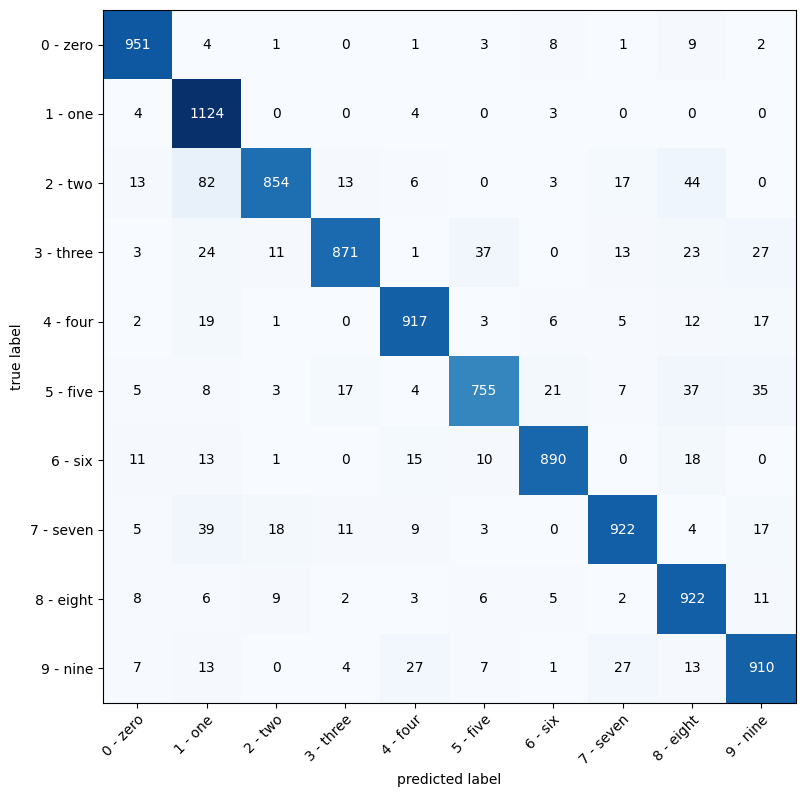

In [20]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
from tqdm.auto import tqdm

# Make prediction with trained model
y_preds = []
model0.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader):
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_logit = model0(X)
    # from logits -> pred probs -> pred labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

    y_preds.append(y_pred.cpu())

# Concantenate list of pred into a tensor cuz torchmetrics takes a tensor
y_pred_tesnor = torch.cat(y_preds)
y_pred_tesnor

# confusion instance
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tesnor,
                         target=test_data.targets)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplot lib likes numpy
    class_names=class_names,
    figsize=(9,9)
)